In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("G:/data sceince/Python/Text mining and feature extraction/Hamspam.csv")

In [4]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or �10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [5]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


### Data Cleaning

In [7]:
import re      # considering the text as regular expression
import string  # as the text data is nothing but string only

In [8]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [9]:
# as our data is in text format so we cannot use and apply any user defined function directly so in order to use the function we will take help of lambda function

clean = lambda x : clean_text(x)    # x means each and every term in our text, to each and every term in our text we will apply the userdefined function

In [10]:
data['text'] = data['text'].apply(clean)
data.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or � cash ne...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [11]:
# Finding the word frequency 

freq = pd.Series(''.join(data['text']).split()).value_counts()[0:20]   # Joined the text data into a paragarph seperated by a space and then splitted the paragraphs into words
freq

to      2239
you     1924
i       1891
a       1419
the     1292
u       1161
and      946
is       866
in       862
my       724
me       704
for      694
your     637
of       615
have     553
call     547
it       538
on       518
that     471
are      459
dtype: int64

Inference: As maximum words are stopwords and there frequency is also high so now we will remove the stopwords

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

u       1298
call     577
im       462
ur       389
get      384
�        300
dont     287
go       282
ok       278
free     275
know     257
like     244
got      239
ill      239
good     236
come     228
time     214
day      203
love     197
send     191
dtype: int64

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [15]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data['text'])
word_freq_df = pd.DataFrame({'Term': vectorizer.get_feature_names(),'occurences': np.asarray(X.sum(axis = 0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurences']/np.sum(word_freq_df['occurences']) 

In [16]:
word_freq_df.head(30)

,Term,occurences,frequency
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
5,aathiwhere,3,0.000065
6,ab,1,0.000022
7,abbey,1,0.000022
8,abdomen,1,0.000022
9,abeg,1,0.000022


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()                                 #todense() will calculate the density of the term
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [19]:
df

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,yes,yesterday,yo,youd,youll,youre,youve,yr,yrs,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* occurence : number of instances 
* frequency : Rate of occurences
* Density   : Total number of events

### N-Gram

In [20]:
#Bi-gram
def get_top_words(corpus,n = None):
    vec1 = CountVectorizer(ngram_range = (2,2),max_features = 2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_of_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq  = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]

In [21]:
top2_words = get_top_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39


[Text(0, 0, 'please call'),
 Text(1, 0, 'call later'),
 Text(2, 0, 'ill call'),
 Text(3, 0, 'let know'),
 Text(4, 0, 'sorry ill'),
 Text(5, 0, 'dont know'),
 Text(6, 0, 'good morning'),
 Text(7, 0, 'po box'),
 Text(8, 0, 'call landline'),
 Text(9, 0, 'take care'),
 Text(10, 0, 'im going'),
 Text(11, 0, 'guaranteed call'),
 Text(12, 0, 'new year'),
 Text(13, 0, 'prize guaranteed'),
 Text(14, 0, 'ok lor'),
 Text(15, 0, 'pls send'),
 Text(16, 0, 'every week'),
 Text(17, 0, 'send stop'),
 Text(18, 0, 'good night'),
 Text(19, 0, 'im gonna')]

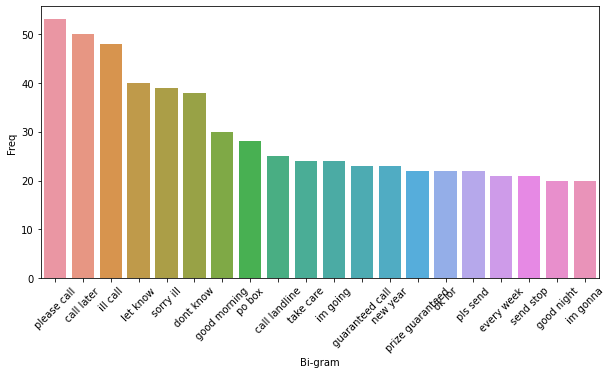

In [22]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [23]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [24]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [25]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


[Text(0, 0, 'ill call later'),
 Text(1, 0, 'sorry ill call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'call land line'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'private account statement'),
 Text(6, 0, 'guaranteed call land'),
 Text(7, 0, 'call identifier code'),
 Text(8, 0, 'land line claim'),
 Text(9, 0, 'draw shows prize'),
 Text(10, 0, 'shows prize guaranteed'),
 Text(11, 0, 'identifier code expires'),
 Text(12, 0, 'pls send message'),
 Text(13, 0, 'account statement shows'),
 Text(14, 0, 'statement shows unredeemed'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right pls'),
 Text(19, 0, 'right pls send')]

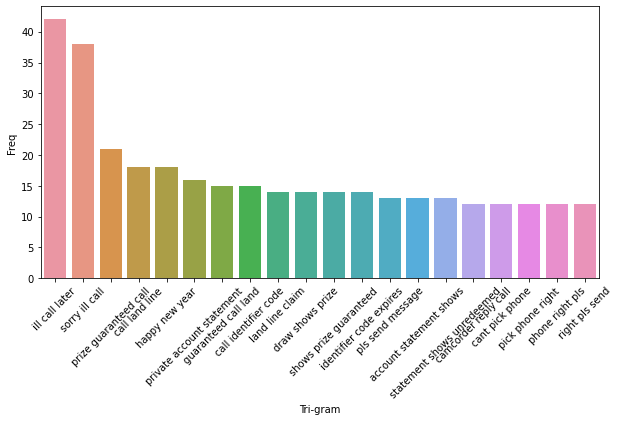

In [26]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [27]:
string_Total = " ".join(data["text"])

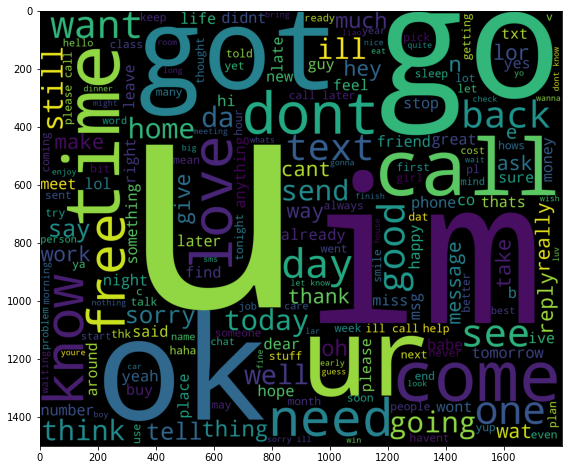

In [28]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [29]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday � cash needs ...
4,spam,okmail dear dave final notice collect tenerife...


In [30]:
# Tokenization
def split_into_words(i):
    return(i.split(" "))

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
email_train,email_test = train_test_split(data, test_size = 0.3)

In [33]:
email_test

,type,text
3269,ham,lets go bill millers
1013,ham,mm feeling sleepy today shall get dear
4808,spam,bored speed dating try speedchat txt speedchat...
4386,ham,haha friend tyler literally asked could get du...
4022,ham,dont anybodys number still havent thought tact...
...,...,...
2804,ham,dont knw pa drink milk
75,ham,bring home wendy
4323,spam,sms services inclusive text credits pls goto w...
2985,ham,sorry de went shop


In [34]:
# converting the text data into structured format

email_bow = CountVectorizer(analyzer = split_into_words).fit(data.text)

In [35]:
all_emails_matrix = email_bow.transform(data.text)
all_emails_matrix.shape

(5559, 8173)

In [37]:
# for training data
train_emails_matrix = email_bow.transform(email_train.text)
train_emails_matrix.shape

(3891, 8173)

In [38]:
# for test data
test_emails_matrix = email_bow.transform(email_test.text)
test_emails_matrix.shape

(1668, 8173)

In [39]:
# Finally building the model

from sklearn.naive_bayes import MultinomialNB as MB      # can be applied on text data for classification purpose
from sklearn.naive_bayes import GaussianNB as GB         # can be applied on numeric data


In [42]:
# Multinomial NB

classifier_MB = MB()
classifier_MB.fit(train_emails_matrix, email_train.type)
train_pred = classifier_MB.predict(train_emails_matrix)
accuracy = np.mean(train_pred == email_train.type)
accuracy

0.9894628630172192

In [43]:
test_pred = classifier_MB.predict(test_emails_matrix)
accuracy = np.mean(test_pred == email_test.type)
accuracy

0.9784172661870504

In [46]:
# Gaussian Naive Bayes 

classifier_GB = GB()
classifier_GB.fit(train_emails_matrix.toarray(), email_train.type)
train_pred = classifier_GB.predict(train_emails_matrix.toarray())
accuracy = np.mean(train_pred == email_train.type)
accuracy

0.9444872783346183

In [47]:
test_pred = classifier_GB.predict(test_emails_matrix.toarray())
accuracy = np.mean(test_pred == email_test.type)
accuracy

0.895083932853717

In [62]:
# Using the Tfidf vectorizer

from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)


(1668, 8173)

In [63]:
train_tfidf.shape # (3891, 6661)

(3891, 8173)

In [64]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

 

In [65]:
accuracy_train_m

0.9719866358262658

In [66]:
accuracy_test_m

0.959832134292566

In [67]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [68]:
accuracy_train_g

0.9444872783346183

In [69]:
accuracy_test_g

0.8932853717026379